# Visual Interface Demo

In [1]:
import zmq
import sys
import math
import time
import subprocess
import numpy as np
import matplotlib.pylab as plt
import pyarrow.plasma as plasma

from statistics import mean
from IPython.display import clear_output
from improv.store import Limbo, ObjectNotFoundError

## Live updating image of zebrafish neural activity

Before running the next cell, the server needs to be started. 

In another terminal window aside from the one needed for this Jupyter Notebook, run `python acq_zmq.py`.

After seeing the message "The store has started" in the terminal, run the next cell!

Note: If you get an ObjectNotFoundError, increase store size in acq_zmq.py.

KeyboardInterrupt: 

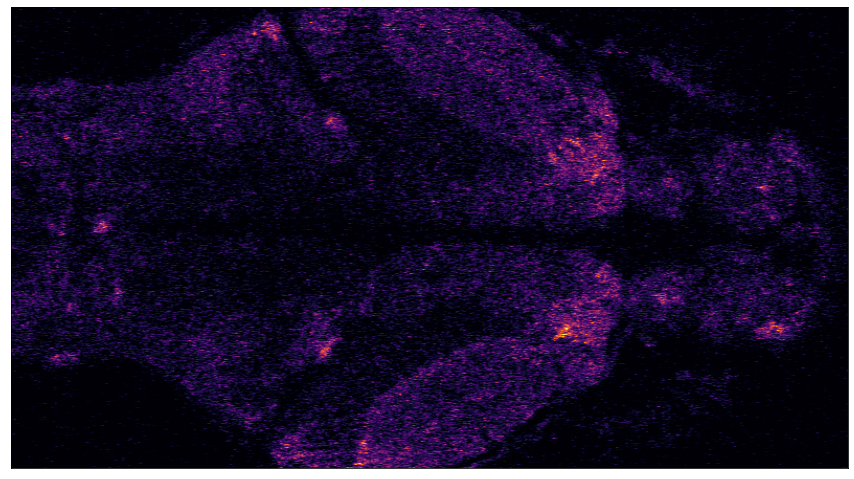

In [52]:
# connecting to the store and setting up the ZMQ socket
lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

# configuration settings for plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
clear_output()

# preparation to start receiving messages
# timing_loop = []
n=1
print("Waiting to receive message from zmq ...")

# loop to run live image updates
while True:
    t1 = time.time()
    clear_output(wait=True)
    
    message = socket.recv()
    object_id = plasma.ObjectID(message)
    try:
        data = lmb.getID(object_id)
    except ObjectNotFoundError:
        pass
        
    ax.cla()
    ax.imshow(data, cmap='inferno')
    display(fig)    

    loop_time = time.time() - t1
    timing_loop.append(loop_time)
    
    n=n+1

### Download image

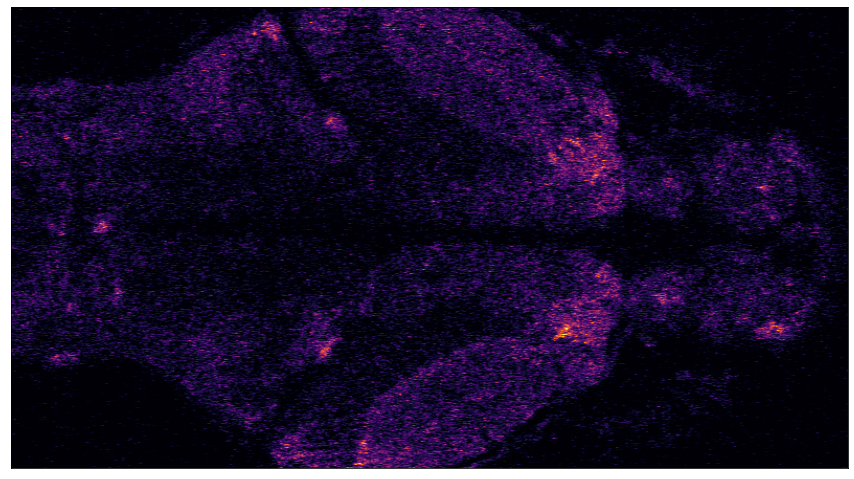

In [53]:
# saving the last image to a png file (to be used on poster)

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.imshow(data, cmap='inferno')
fig.savefig('brain_image.png', dpi=200)

### Timing efficiency for each frame

In [ ]:
# histogram for timing each frame

timing_loop2 = timing_loop.pop(3330) # removing outlier due to computer sleeping

fig1, ax1 = plt.subplots()

ax1.hist(timing_loop2)
plt.title('Timing for Jupyter Loop to Plot Image')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
fig1.set_size_inches(10, 8)


In [ ]:
max(timing_loop)
timing_loop.index(1599.9333963394165)

In [ ]:
# frame timing each iteration

timing_loop.pop(2701) # removing outlier due to computer sleeping
a = np.arange(len(timing_loop))

fig2, ax2 = plt.subplots()

plt.title('Timing for Jupyter Loop to Plot Image')
plt.xlabel('Loop Number')
plt.ylabel('Time (seconds)')
fig2.set_size_inches(10, 8)

ax2.plot(a, timing_loop)

## Timing of different functions for live updates

KeyboardInterrupt: 

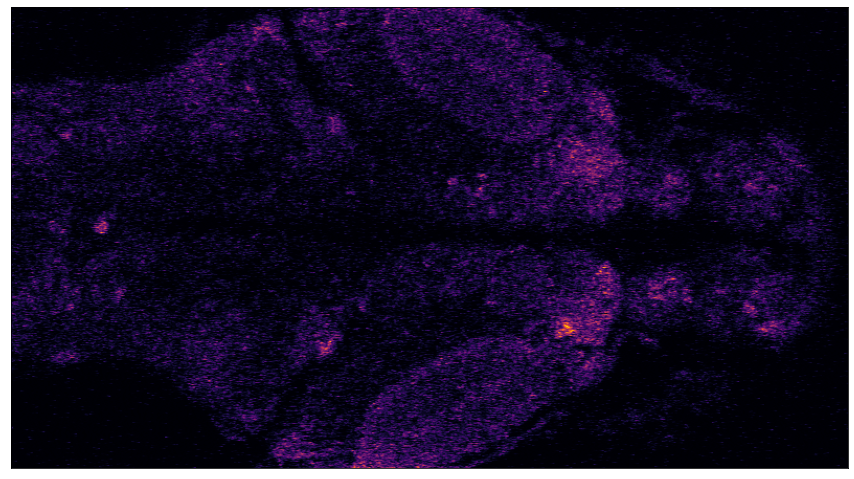

In [4]:
# connecting to the store and setting up the ZMQ socket
lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

# configuration settings for plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
clear_output()

# preparation to start receiving messages
timestore=[]
timeget=[]
timeplot=[]
n=1
print("Waiting to receive message from zmq ...")

# loop to run live image updates
while True:
    clear_output(wait=True)

    # receive message from ZMQ (blue line)
    t11 = time.time()
    message = socket.recv()
    t12 = time.time() - t11
    
    # get data from store (orange line)
    t21 = time.time()
    object_id = plasma.ObjectID(message) 
    try:
        data = lmb.getID(object_id)
    except ObjectNotFoundError:
        pass
    t22 = time.time() - t21

    # plot data (purple line)
    t41 = time.time()
    ax.cla()
    ax.imshow(data, cmap='inferno')
    display(fig)    
    t42 = time.time() - t41

    timestore.append(t12) #blue
    timeget.append(t22) #orange
    timeplot.append(t42) #purple
    n=n+1

<Figure size 432x288 with 0 Axes>

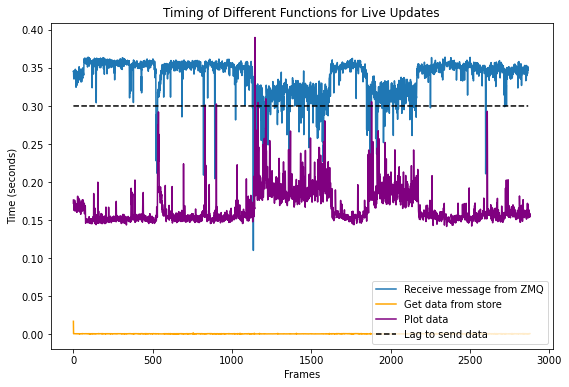

In [55]:
# plotting the timing for various code lines of the main loop

timestore.pop(0)
a = np.arange(len(timestore))
b = np.arange(len(timeget))
c = np.arange(len(timeplot))

lag = [.3 for number in range(len(timestore))]
d = np.arange(len(lag))

fig = plt.figure()
plt.figure(figsize=(9, 6))
plt.plot(a, timestore, color="tab:blue", label="Receive message from ZMQ")
plt.plot(b, timeget, color="orange", label="Get data from store")
plt.plot(c, timeplot, color="purple",label="Plot data")
plt.plot(d, lag, color="black", label="Lag to send data", linestyle='dashed')
plt.xlabel('Frames')
plt.ylabel('Time (seconds)')
plt.title('Timing of Different Functions for Live Updates')
plt.legend(loc='lower right')
plt.gcf()
plt.savefig('timing_fxns.png', dpi=300)

# Live updates with raw_C.txt data

add instructions for acq_zmq.py file

ValueError: Object ID must by 20 bytes, is b'quit'

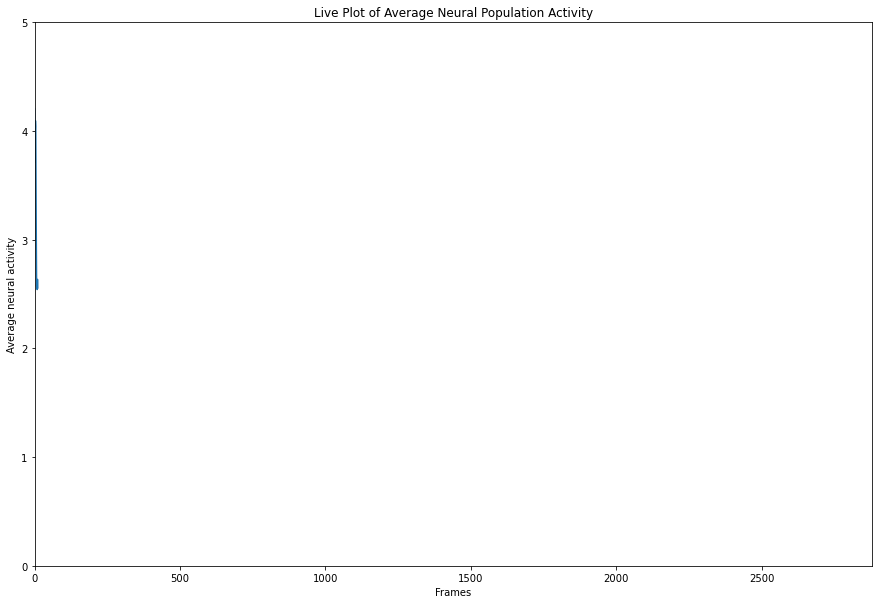

In [15]:
# connecting to the store and setting up the ZMQ socket
lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

# configuration settings for plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1) 
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)

clear_output()


# preparation to start receiving messages
timing_loop = []
rawcdata = []
n=1
print("Waiting to receive message from zmq ...")

# loop to run live image updates    
while True:
    t1 = time.time()
    clear_output(wait=True)
    message = socket.recv()
    object_id = plasma.ObjectID(message)
    
    try:
        data2 = lmb.getID(object_id)
    except ObjectNotFoundError:
        pass

    rawcdata.append(data2)
    mean_per_frame = []

    for r in rawcdata:
        mean_per_frame.append(mean(c for c in r if c!=0))

    frames = np.arange(len(mean_per_frame))

    ax.cla()
    ax.plot(frames, mean_per_frame)        
    plt.xlim([0, 2878]) #2878
    plt.ylim([0, 5])
    plt.xlabel('Frames')
    plt.ylabel('Average neural activity')
    plt.title('Live Plot of Average Neural Population Activity')
    display(fig)    
    
    loop_time = time.time() - t1
    timing_loop.append(loop_time)
    n=n+1
    
#     if socket.recv() == 'quit':
#         False

# Trying live image updates using jupyterplot package

copy link for github page

ValueError: Line updates not of type list!

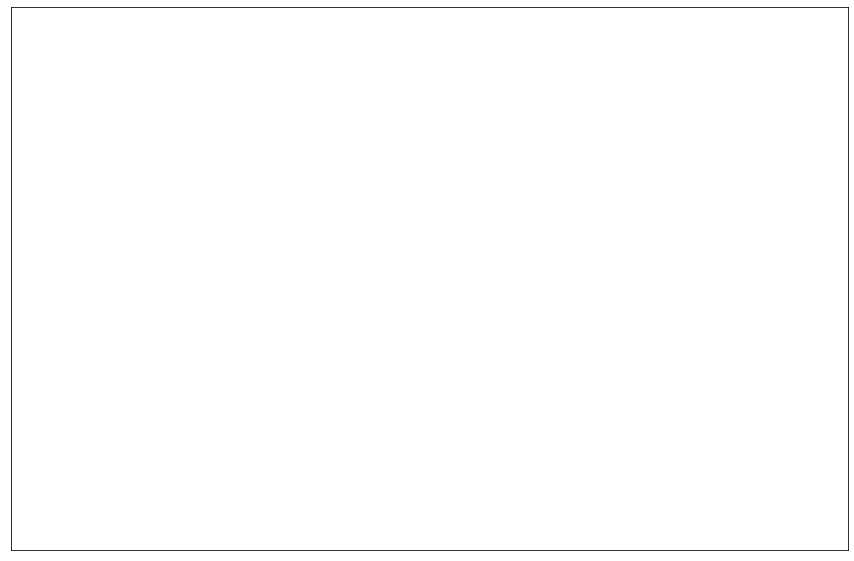

In [4]:
from jupyterplot import ProgressPlot
pp1 = ProgressPlot()

# connecting to the store and setting up the ZMQ socket
lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

# configuration settings for plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
clear_output()

# preparation to start receiving messages
timing_loop = []
n=1
print("Waiting to receive message from zmq ...")

# loop to run live image updates
while True:
#     t1 = time.time()
    clear_output(wait=True)
    message = socket.recv()
    object_id = plasma.ObjectID(message)
    data = lmb.getID(object_id)
    data_list = [data]
    
    pp1.update(data_list) #cmap='inferno'
    pp1.finalize()

    loop_time = time.time() - t1
    timing_loop.append(loop_time)
    n=n+1